In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    roc_curve, auc,
)
from lightgbm import LGBMClassifier
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from lightgbm import early_stopping, log_evaluation

In [2]:
df = pd.read_csv('data/data.csv', low_memory=False)

In [3]:
max_vals = df.select_dtypes(include='number').max()
max_9 = max_vals[max_vals == 9].index.tolist()
for col in max_9:
    df.loc[df[col] == 9, col] = np.nan 
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

missing_subset = {'ALCFREQ', 'HATTMULT', 'STROKMUL', 'TIAMULT', 'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'CVDCOG', 'STROKCOG', 'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'PDNORMAL', 'SPEECH', 'FACEXP', 'TRESTRHD', 'TRESTLHD', 'TRESTRFT', 'TRESTLFT', 'TRACTRHD', 'TRACTLHD', 'RIGDNECK', 'RIGDUPRT', 'RIGDUPLF', 'RIGDLORT', 'RIGDLOLF', 'TAPSRT', 'TAPSLF', 'HANDMOVR', 'HANDMOVL', 'HANDALTR', 'HANDALTL', 'LEGRT', 'LEGLF', 'ARISING', 'POSTURE', 'GAIT', 'POSSTAB', 'BRADYKIN', 'RESTTRL', 'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'POSTINST', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL', 'CORTVISR', 'SOMATL', 'SOMATR', 'EYEPSP', 'DYSPSP', 'AXIALPSP', 'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR', 'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'MOMOPARK', 'MOMOALS', 'AMNDEM', 'PCA', 'NAMNDEM', 'AMYLPET', 'AMYLCSF', 'FDGAD', 'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH', 'IMAGEWMH', 'CANCER', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS', 'ARTH', 'ARTYPE', 'ARTUPEX', 'ARTLOEX', 'ARTSPIN', 'ARTUNKN', 'URINEINC', 'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC'}
cols_to_change = list(missing_subset.intersection(max_8))
df[cols_to_change] = df[cols_to_change].replace(8, np.nan)
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

df = df.drop(columns=['NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3', 'NPOLD4', 'NACCMICR', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NACCHEM', 'NACCARTE', 'NPWMR', 'NPPATH', 'NACCNEC', 'NPPATH2', 'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10', 'NPPATH11', 'NACCLEWY', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3', 'NPOFTD4', 'NPOFTD5', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE', 'NPPDXA', 'NPPDXB', 'NACCPRIO', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPARTAG', 'NPATGSEV', 'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'])

initial = df.shape[1]
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis=1)
remaining = df.shape[1]
dropped = initial - remaining

impairment_vars = ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']

functional_impairment = df[impairment_vars].sum(axis=1, skipna=True)

df = pd.concat([df, functional_impairment.rename('FUNCTIONAL_IMPAIRMENT')], axis=1)
df.drop(columns=impairment_vars, inplace=True)

df = df.copy()

conditions = [
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == True),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == True)
]
values = [np.nan, True, False, False]

df["OUTCOME_WITHIN_4_YEARS"] = np.select(conditions, values, default=np.nan)
df = df.dropna(subset=["OUTCOME_WITHIN_4_YEARS"])

df = df.drop(columns=['TIME', 'OUTCOME_EVENTMCI'])
X = df.drop(columns=['OUTCOME_WITHIN_4_YEARS'])
y = df['OUTCOME_WITHIN_4_YEARS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

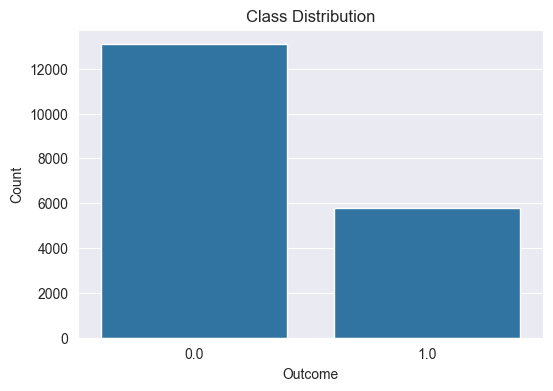

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='OUTCOME_WITHIN_4_YEARS', data=df)
plt.title('Class Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [3]:
class HandleOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.3, upper_quantile=0.7):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.quantile_bounds_ = {}
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
        
        for col in numeric_columns:
            Q1 = X[col].quantile(self.lower_quantile)
            Q2 = X[col].quantile(self.upper_quantile)
            IQR = Q2 - Q1
            self.quantile_bounds_[col] = {
                'lower_bound': Q1 - 1.5 * IQR,
                'upper_bound': Q2 + 1.5 * IQR
            }
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

        for col in numeric_columns:
            if col not in self.quantile_bounds_:
                continue  
            bounds = self.quantile_bounds_[col]
            mean_value = X[col].mean()
            
            X[col] = np.where(X[col] < bounds['lower_bound'], mean_value, 
                              np.where(X[col] > bounds['upper_bound'], mean_value, X[col]))
        return X.values

In [9]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=mutual_info_classif, k=100)
rfe = RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'), n_features_to_select=50)

lgbm_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=2)),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=10, min_child_samples=50, n_estimators=500, num_leaves=31, subsample=1))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

cv_scores = cross_val_score(lgbm_pipeline, X, y, cv=cv, scoring='roc_auc')

print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean ROC AUC: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

lgbm_pipeline.fit(X_train, y_train)

test_proba = lgbm_pipeline.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)

train_proba = lgbm_pipeline.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")

C:\Bakalarka\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 10467, number of negative: 10467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9409
[LightGBM] [Info] Number of data points in the train set: 20934, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 10468, number of negative: 10468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10060
[LightGBM] [Info] Number of data points in the train set: 20936, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 10467, number of negative: 10467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9785
[LightGBM] [Info] Number of data points in the train set: 20934, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 10467, number of negative: 10467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9242
[LightGBM] [Info] Number of data points in the train set: 20934, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 10467, number of negative: 10467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9659
[LightGBM] [Info] Number of data points in the train set: 20934, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Cross-validation ROC AUC scores: [0.96476526 0.96581232 0.95801358 0.95959344 0.9658259 ]
Mean ROC AUC: 0.9628
Standard deviation: 0.0033


C:\Bakalarka\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 10493, number of negative: 10493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005602 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9142
[LightGBM] [Info] Number of data points in the train set: 20986, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training roc_auc: 0.9781148429035753
Testing roc_auc: 0.9604954223956493


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [8]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=mutual_info_classif, k=100)
rfe = RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'), n_features_to_select=50)

lgbm_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=10, min_child_samples=50, n_estimators=500, num_leaves=31, subsample=1, is_unbalance=True))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

cv_scores = cross_val_score(lgbm_pipeline, X, y, cv=cv, scoring='roc_auc')

print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean ROC AUC: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

lgbm_pipeline.fit(X_train, y_train)

test_proba = lgbm_pipeline.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)

train_proba = lgbm_pipeline.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")

[LightGBM] [Info] Number of positive: 4641, number of negative: 10467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 473
[LightGBM] [Info] Number of data points in the train set: 15108, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307188 -> initscore=-0.813298
[LightGBM] [Info] Start training from score -0.813298


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4641, number of negative: 10468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307168 -> initscore=-0.813393
[LightGBM] [Info] Start training from score -0.813393


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4642, number of negative: 10467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 467
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307234 -> initscore=-0.813082
[LightGBM] [Info] Start training from score -0.813082


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4642, number of negative: 10467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307234 -> initscore=-0.813082
[LightGBM] [Info] Start training from score -0.813082


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4642, number of negative: 10467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307234 -> initscore=-0.813082
[LightGBM] [Info] Start training from score -0.813082


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Cross-validation ROC AUC scores: [0.9671442  0.96882104 0.96282925 0.96662505 0.96760736]
Mean ROC AUC: 0.9666
Standard deviation: 0.0020
[LightGBM] [Info] Number of positive: 4615, number of negative: 10493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 470
[LightGBM] [Info] Number of data points in the train set: 15108, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305467 -> initscore=-0.821397
[LightGBM] [Info] Start training from score -0.821397


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training roc_auc: 0.9787552533345504
Testing roc_auc: 0.9652208067781775


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [8]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.70)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=mutual_info_classif, k=100)
rfe = RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'), n_features_to_select=50)

lgbm_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=2)),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=10, min_child_samples=50, n_estimators=500, num_leaves=31, subsample=1))
])

param_grid_lgbm = {
    'classifier__max_depth': [5, 7, 10, 12]
}

grid_search_lgbm = GridSearchCV(
    estimator=lgbm_pipeline,
    param_grid=param_grid_lgbm,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=2
)

grid_search_lgbm.fit(X_train, y_train)
print("RF Best Parameters:", grid_search_lgbm.best_params_)
print("Best roc_auc score:", grid_search_lgbm.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Bakalarka\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 10493, number of negative: 10493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9142
[LightGBM] [Info] Number of data points in the train set: 20986, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

early stopping:

In [6]:
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_var = var_thresh.fit_transform(X_train_trans, y_train)
X_k = select_k.fit_transform(X_var, y_train)
X_rfe = rfe.fit_transform(X_k, y_train)

X_test_var = var_thresh.transform(X_test_trans)
X_test_k = select_k.transform(X_test_var)
X_test_rfe = rfe.transform(X_test_k)

clf = LGBMClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=7,
    min_child_samples=50,
    n_estimators=500,
    num_leaves=31,
    subsample=1,
    is_unbalance=True, 
    random_state=2
)

clf.fit(
    X_rfe, y_train,
    eval_set=[(X_test_rfe, y_test)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(10)
    ]
)

test_proba = clf.predict_proba(X_test_rfe)[:, 1]
train_proba = clf.predict_proba(X_rfe)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")


[LightGBM] [Info] Number of positive: 4641, number of negative: 10467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 471
[LightGBM] [Info] Number of data points in the train set: 15108, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307188 -> initscore=-0.813298
[LightGBM] [Info] Start training from score -0.813298


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4641, number of negative: 10468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307168 -> initscore=-0.813393
[LightGBM] [Info] Start training from score -0.813393


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4642, number of negative: 10467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307234 -> initscore=-0.813082
[LightGBM] [Info] Start training from score -0.813082


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4642, number of negative: 10467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307234 -> initscore=-0.813082
[LightGBM] [Info] Start training from score -0.813082


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4642, number of negative: 10467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307234 -> initscore=-0.813082
[LightGBM] [Info] Start training from score -0.813082


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Cross-validation ROC AUC scores: [0.96716312 0.96856126 0.96329899 0.96641357 0.96701145]
Mean ROC AUC: 0.9665
Standard deviation: 0.0017
[LightGBM] [Info] Number of positive: 4615, number of negative: 10493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 482
[LightGBM] [Info] Number of data points in the train set: 15108, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305467 -> initscore=-0.821397
[LightGBM] [Info] Start training from score -0.821397


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training roc_auc: 0.9794261644170973
Testing roc_auc: 0.9651554519126379


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [10]:
df = pd.read_csv('data/data.csv', low_memory=False)

In [9]:
max_vals = df.select_dtypes(include='number').max()
max_9 = max_vals[max_vals == 9].index.tolist()
for col in max_9:
    df.loc[df[col] == 9, col] = np.nan 
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

missing_subset = {'ALCFREQ', 'HATTMULT', 'STROKMUL', 'TIAMULT', 'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'CVDCOG', 'STROKCOG', 'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'PDNORMAL', 'SPEECH', 'FACEXP', 'TRESTRHD', 'TRESTLHD', 'TRESTRFT', 'TRESTLFT', 'TRACTRHD', 'TRACTLHD', 'RIGDNECK', 'RIGDUPRT', 'RIGDUPLF', 'RIGDLORT', 'RIGDLOLF', 'TAPSRT', 'TAPSLF', 'HANDMOVR', 'HANDMOVL', 'HANDALTR', 'HANDALTL', 'LEGRT', 'LEGLF', 'ARISING', 'POSTURE', 'GAIT', 'POSSTAB', 'BRADYKIN', 'RESTTRL', 'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'POSTINST', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL', 'CORTVISR', 'SOMATL', 'SOMATR', 'EYEPSP', 'DYSPSP', 'AXIALPSP', 'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR', 'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'MOMOPARK', 'MOMOALS', 'AMNDEM', 'PCA', 'NAMNDEM', 'AMYLPET', 'AMYLCSF', 'FDGAD', 'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH', 'IMAGEWMH', 'CANCER', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS', 'ARTH', 'ARTYPE', 'ARTUPEX', 'ARTLOEX', 'ARTSPIN', 'ARTUNKN', 'URINEINC', 'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC'}
cols_to_change = list(missing_subset.intersection(max_8))
df[cols_to_change] = df[cols_to_change].replace(8, np.nan)
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

df = df.drop(columns=['NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3', 'NPOLD4', 'NACCMICR', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NACCHEM', 'NACCARTE', 'NPWMR', 'NPPATH', 'NACCNEC', 'NPPATH2', 'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10', 'NPPATH11', 'NACCLEWY', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3', 'NPOFTD4', 'NPOFTD5', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE', 'NPPDXA', 'NPPDXB', 'NACCPRIO', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPARTAG', 'NPATGSEV', 'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'])

initial = df.shape[1]
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis=1)
remaining = df.shape[1]
dropped = initial - remaining

impairment_vars = ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']

functional_impairment = df[impairment_vars].sum(axis=1, skipna=True)

df = pd.concat([df, functional_impairment.rename('FUNCTIONAL_IMPAIRMENT')], axis=1)
df.drop(columns=impairment_vars, inplace=True)

original_df = df.copy()


conditions = [
    (df["TIME"] < 2) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] < 2) & (df["OUTCOME_EVENTMCI"] == True),
    (df["TIME"] >= 2) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] >= 2) & (df["OUTCOME_EVENTMCI"] == True)
]
values = [np.nan, True, False, False]

df["OUTCOME_WITHIN_2_YEARS"] = np.select(conditions, values, default=np.nan)
df = df.dropna(subset=["OUTCOME_WITHIN_2_YEARS"])

df = df.drop(columns=['TIME', 'OUTCOME_EVENTMCI'])
X = df.drop(columns=['OUTCOME_WITHIN_2_YEARS'])
y = df['OUTCOME_WITHIN_2_YEARS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

[LightGBM] [Info] Number of positive: 4615, number of negative: 10493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 15108, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305467 -> initscore=-0.821397
[LightGBM] [Info] Start training from score -0.821397
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.961091	valid_0's binary_logloss: 0.5616
[20]	valid_0's auc: 0.962827	valid_0's binary_logloss: 0.514238
[30]	valid_0's auc: 0.963321	valid_0's binary_logloss: 0.47469
[40]	valid_0's auc: 0.963481	valid_0's binary_logloss: 0.442157
[50]	valid_0's auc: 0.963431	valid_0's binary_logloss: 0.414985
[60]	valid_0's auc: 0.963305	valid_0's binary_logloss: 0.392937
[7

C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [10]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=mutual_info_classif, k=100)
rfe = RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'), n_features_to_select=50)

lgbm2_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=10, min_child_samples=50, n_estimators=500, num_leaves=31, subsample=1, random_state=2))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

cv_scores = cross_val_score(lgbm2_pipeline, X, y, cv=cv, scoring='roc_auc')

print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean ROC AUC: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

lgbm2_pipeline.fit(X_train, y_train)

test_proba = lgbm2_pipeline.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)

train_proba = lgbm2_pipeline.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")

[LightGBM] [Info] Number of positive: 4615, number of negative: 10493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 466
[LightGBM] [Info] Number of data points in the train set: 15108, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305467 -> initscore=-0.821397
[LightGBM] [Info] Start training from score -0.821397
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.963358	valid_0's binary_logloss: 0.565578
[20]	valid_0's auc: 0.963624	valid_0's binary_logloss: 0.519123
[30]	valid_0's auc: 0.963711	valid_0's binary_logloss: 0.480602
[40]	valid_0's auc: 0.963747	valid_0's binary_logloss: 0.447872
[50]	valid_0's auc: 0.963996	valid_0's binary_logloss: 0.419314
[60]	valid_0's auc: 0.963956	valid_0's binary_logloss: 0.394857

C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [7]:
df = pd.read_csv('data/data.csv', low_memory=False)

In [4]:
def build_outcome_column(df, year):
    conditions = [
        (df["TIME"] < year) & (df["OUTCOME_EVENTMCI"] == False),
        (df["TIME"] < year) & (df["OUTCOME_EVENTMCI"] == True),
        (df["TIME"] >= year) & (df["OUTCOME_EVENTMCI"] == False),
        (df["TIME"] >= year) & (df["OUTCOME_EVENTMCI"] == True)
    ]
    values = [np.nan, True, False, False]
    df[f"OUTCOME_WITHIN_{year}_YEARS"] = np.select(conditions, values, default=np.nan)
    return df

In [8]:
years = [3, 4, 5, 6]
roc_data = {}
pipelines = {}
cv_scores_all = {}

max_vals = df.select_dtypes(include='number').max()
max_9 = max_vals[max_vals == 9].index.tolist()
for col in max_9:
    df.loc[df[col] == 9, col] = np.nan 
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

missing_subset = {'ALCFREQ', 'HATTMULT', 'STROKMUL', 'TIAMULT', 'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'CVDCOG', 'STROKCOG', 'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'PDNORMAL', 'SPEECH', 'FACEXP', 'TRESTRHD', 'TRESTLHD', 'TRESTRFT', 'TRESTLFT', 'TRACTRHD', 'TRACTLHD', 'RIGDNECK', 'RIGDUPRT', 'RIGDUPLF', 'RIGDLORT', 'RIGDLOLF', 'TAPSRT', 'TAPSLF', 'HANDMOVR', 'HANDMOVL', 'HANDALTR', 'HANDALTL', 'LEGRT', 'LEGLF', 'ARISING', 'POSTURE', 'GAIT', 'POSSTAB', 'BRADYKIN', 'RESTTRL', 'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'POSTINST', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL', 'CORTVISR', 'SOMATL', 'SOMATR', 'EYEPSP', 'DYSPSP', 'AXIALPSP', 'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR', 'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'MOMOPARK', 'MOMOALS', 'AMNDEM', 'PCA', 'NAMNDEM', 'AMYLPET', 'AMYLCSF', 'FDGAD', 'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH', 'IMAGEWMH', 'CANCER', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS', 'ARTH', 'ARTYPE', 'ARTUPEX', 'ARTLOEX', 'ARTSPIN', 'ARTUNKN', 'URINEINC', 'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC'}
cols_to_change = list(missing_subset.intersection(max_8))
df[cols_to_change] = df[cols_to_change].replace(8, np.nan)
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

df = df.drop(columns=['NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3', 'NPOLD4', 'NACCMICR', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NACCHEM', 'NACCARTE', 'NPWMR', 'NPPATH', 'NACCNEC', 'NPPATH2', 'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10', 'NPPATH11', 'NACCLEWY', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3', 'NPOFTD4', 'NPOFTD5', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE', 'NPPDXA', 'NPPDXB', 'NACCPRIO', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPARTAG', 'NPATGSEV', 'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'])

initial = df.shape[1]
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis=1)
remaining = df.shape[1]
dropped = initial - remaining

impairment_vars = ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']

functional_impairment = df[impairment_vars].sum(axis=1, skipna=True)

df = pd.concat([df, functional_impairment.rename('FUNCTIONAL_IMPAIRMENT')], axis=1)
df.drop(columns=impairment_vars, inplace=True)
base_df = df.copy()
for year in years:
    df = build_outcome_column(df, year)
    col_name = f"OUTCOME_WITHIN_{year}_YEARS"
    row_count = df[col_name].notna().sum()
    print(f"Year {year}: {row_count} rows")

Year 3: 20731 rows
Year 4: 18886 rows
Year 5: 17449 rows
Year 6: 16063 rows


In [11]:
years = [3, 4, 5, 6]
roc_data = {}
pipelines = {}
cv_scores_all = {}

max_vals = df.select_dtypes(include='number').max()
max_9 = max_vals[max_vals == 9].index.tolist()
for col in max_9:
    df.loc[df[col] == 9, col] = np.nan 
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

missing_subset = {'ALCFREQ', 'HATTMULT', 'STROKMUL', 'TIAMULT', 'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'CVDCOG', 'STROKCOG', 'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'PDNORMAL', 'SPEECH', 'FACEXP', 'TRESTRHD', 'TRESTLHD', 'TRESTRFT', 'TRESTLFT', 'TRACTRHD', 'TRACTLHD', 'RIGDNECK', 'RIGDUPRT', 'RIGDUPLF', 'RIGDLORT', 'RIGDLOLF', 'TAPSRT', 'TAPSLF', 'HANDMOVR', 'HANDMOVL', 'HANDALTR', 'HANDALTL', 'LEGRT', 'LEGLF', 'ARISING', 'POSTURE', 'GAIT', 'POSSTAB', 'BRADYKIN', 'RESTTRL', 'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'POSTINST', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL', 'CORTVISR', 'SOMATL', 'SOMATR', 'EYEPSP', 'DYSPSP', 'AXIALPSP', 'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR', 'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'MOMOPARK', 'MOMOALS', 'AMNDEM', 'PCA', 'NAMNDEM', 'AMYLPET', 'AMYLCSF', 'FDGAD', 'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH', 'IMAGEWMH', 'CANCER', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS', 'ARTH', 'ARTYPE', 'ARTUPEX', 'ARTLOEX', 'ARTSPIN', 'ARTUNKN', 'URINEINC', 'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC'}
cols_to_change = list(missing_subset.intersection(max_8))
df[cols_to_change] = df[cols_to_change].replace(8, np.nan)
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

df = df.drop(columns=['NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3', 'NPOLD4', 'NACCMICR', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NACCHEM', 'NACCARTE', 'NPWMR', 'NPPATH', 'NACCNEC', 'NPPATH2', 'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10', 'NPPATH11', 'NACCLEWY', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3', 'NPOFTD4', 'NPOFTD5', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE', 'NPPDXA', 'NPPDXB', 'NACCPRIO', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPARTAG', 'NPATGSEV', 'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'])

initial = df.shape[1]
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis=1)
remaining = df.shape[1]
dropped = initial - remaining

impairment_vars = ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']

functional_impairment = df[impairment_vars].sum(axis=1, skipna=True)

df = pd.concat([df, functional_impairment.rename('FUNCTIONAL_IMPAIRMENT')], axis=1)
df.drop(columns=impairment_vars, inplace=True)
base_df = df.copy()

for year in years:
    df = base_df.copy()
    df = build_outcome_column(df, year)
    df.dropna(subset=[f"OUTCOME_WITHIN_{year}_YEARS"], inplace=True)

    df = df.drop(columns=['TIME', 'OUTCOME_EVENTMCI'])
    X = df.drop(columns=[f"OUTCOME_WITHIN_{year}_YEARS"])
    y = df[f"OUTCOME_WITHIN_{year}_YEARS"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    num_cols = X.select_dtypes(include='number').columns
    cat_cols = X.select_dtypes(include='object').columns

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), 
        ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
        ('scaler', StandardScaler())
    ])
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    preprocessor = ColumnTransformer([
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ])

    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('variance_threshold', VarianceThreshold(threshold=0.1)),
        ('select_k_best', SelectKBest(score_func=mutual_info_classif, k=100)),
        ('rfe', RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'), n_features_to_select=50)),
        ('classifier', LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=10, 
                                      min_child_samples=50, n_estimators=500, num_leaves=31, 
                                      subsample=1, random_state=2))
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
    cv_scores_all[year] = cv_scores

    pipeline.fit(X_train, y_train)
    pipelines[year] = pipeline

    y_prob = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[f"{year} Year target"] = (fpr, tpr, roc_auc)


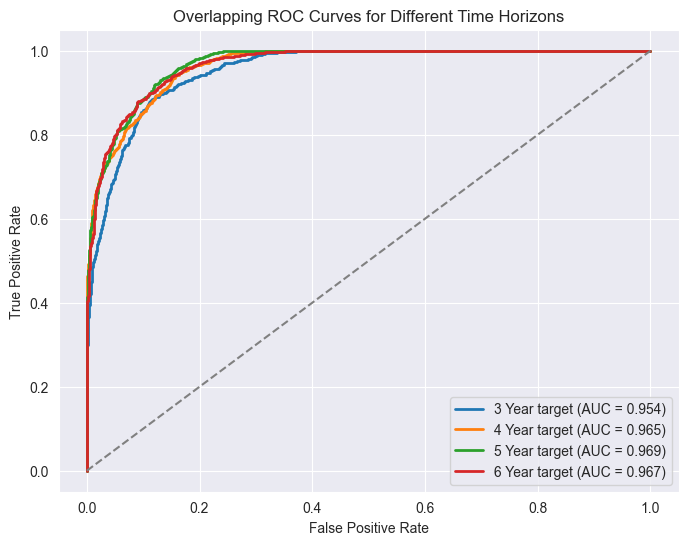

In [16]:
plt.figure(figsize=(8, 6))

for label, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Overlapping ROC Curves for Different Time Horizons")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [17]:
for year, scores in cv_scores_all.items():
    print(f"{year} Year CV AUC: {scores.mean():.4f} ± {scores.std():.4f}")

3 Year CV AUC: 0.9584 ± 0.0089
4 Year CV AUC: 0.9667 ± 0.0018
5 Year CV AUC: 0.9698 ± 0.0015
6 Year CV AUC: 0.9656 ± 0.0017
